In [23]:
import speech_recognition as sr

In [24]:


def decode_speech_from_mic(recognizer, microphone):

    # check that recognizer and microphone arguments are appropriate type
    if not isinstance(recognizer, sr.Recognizer):
        raise TypeError("`recognizer` must be `Recognizer` instance")

    if not isinstance(microphone, sr.Microphone):
        raise TypeError("`microphone` must be `Microphone` instance")

    # adjust the recognizer sensitivity to ambient noise and record audio
    # from the microphone
    with microphone as source:
        print("say something")
        recognizer.adjust_for_ambient_noise(source) # #  analyze the audio source for 1 second
        audio = recognizer.listen(source)

    # set up the response object
    response = {
        "success": True,
        "error": None,
        "transcription": None
    }

    # try recognizing the speech in the recording
    # if a RequestError or UnknownValueError exception is caught,
    #   update the response object accordingly
    try:
        response["transcription"] = recognizer.recognize_google(audio)
    except sr.RequestError:
        # API was unreachable or unresponsive
        response["success"] = False
        response["error"] = "API unavailable/unresponsive"
    except sr.UnknownValueError:
        # speech was unintelligible
        response["error"] = "Unable to recognize speech"

    return response



In [25]:


recognizer = sr.Recognizer()



In [26]:
mic = sr.Microphone(device_index=1)

In [27]:
response = decode_speech_from_mic(recognizer, mic)


say something


In [28]:
print('\nSuccess : {}\nError   : {}\n\nText from Speech\n{}\n\n{}' \
          .format(response['success'],
                  response['error'],
                  '-'*17,
                  response['transcription']))




Success : True
Error   : None

Text from Speech
-----------------

I am the very model of the modern major general


In [32]:
temp_str = ''
records_all = []
while (temp_str != 'finish'):
    print('Speak it out')
    response = decode_speech_from_mic(recognizer, mic)
    if response['success']:
        temp_str = response['transcription']
        print('You said :' ,temp_str )
        if (temp_str != 'finish'):
            records_all.append(temp_str)

print('Your suggestions were:')
print(records_all)

Speak it out
say something
You said : Mr blue sky
Speak it out
say something
You said : I am hungry
Speak it out
say something
You said : I was crying yesterday
Speak it out
say something
You said : but I am happy now
Speak it out
say something
You said : finish
Your suggestions were:
['Mr blue sky', 'I am hungry', 'I was crying yesterday', 'but I am happy now']


In [33]:
from textblob import TextBlob

In [34]:
def get_sentiment(sentx):
        '''
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        '''
        # create TextBlob object of passed text
        analysis = TextBlob(sentx)
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return ('positive')
        elif analysis.sentiment.polarity == 0:
            return ('neutral')
        else:
            return ('negative')

In [35]:
# Select from collection
sentimets_total = {'neutral': 0 , 'positive' : 0 , 'negative':0}
for recd_sent in records_all:
    sentiment = get_sentiment(recd_sent)
    print (sentiment,'===>',recd_sent)
    sentimets_total[sentiment] = sentimets_total[sentiment] + 1
    print("-----------------------------------------------------")
print(sentimets_total)



neutral ===> Mr blue sky
-----------------------------------------------------
neutral ===> I am hungry
-----------------------------------------------------
negative ===> I was crying yesterday
-----------------------------------------------------
positive ===> but I am happy now
-----------------------------------------------------
{'neutral': 2, 'positive': 1, 'negative': 1}


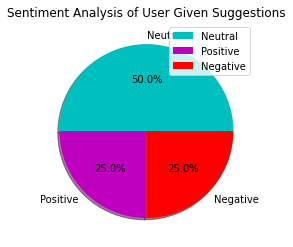

In [37]:


from matplotlib import pyplot as plt
slices = [sentimets_total['neutral'],sentimets_total['positive'],sentimets_total['negative']]
activities = ['Neutral','Positive','Negative']
cols = ['c','m','r',]

plt.pie(slices,
        labels=activities,
        colors=cols,
        shadow= True,
        autopct='%1.1f%%')

plt.title('Sentiment Analysis of User Given Suggestions')
plt.legend()
plt.show()